# Commonly used Numpy operations and Basic Charting with Matplotlib and Seaborn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Creating Numpy Arrays
### 1.1. Creating np Array and Basic Manipulations for Handling/Shaping Arrays

In [2]:
# from python list/tuple

p1 = np.arange(24) # [i for i in range(16)]

x1 = np.array(p1, dtype=float)
print(x1)

x1.shape = [1,2,4,3] # can use tuple or list, but must have exact # of elements
print(x1)
print('size of array is: ', x1.size, '; its shape is: ', x1.shape, ' with ', x1.ndim, ' dimensions.', '\n')

x1 = x1.flatten('C').reshape(3,-1)
print(x1)
print('Flatten the C-way takes column first, then reshape to 3 rows with "-1" automatically assigned for col dimension\n')

x1 = x1.ravel('F').reshape(-1,4) # reshape and ravel only work for re-asignment of variable, otherwise use size
print(x1)
print('unroll the Fortran-way takes row first, then reshape to 4 columns with "-1" automatically assigned for row dimension\n')

x2 = np.array(x1, dtype=complex) + 0.5j
print(x2)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23.]
[[[[ 0.  1.  2.]
   [ 3.  4.  5.]
   [ 6.  7.  8.]
   [ 9. 10. 11.]]

  [[12. 13. 14.]
   [15. 16. 17.]
   [18. 19. 20.]
   [21. 22. 23.]]]]
size of array is:  24 ; its shape is:  (1, 2, 4, 3)  with  4  dimensions. 

[[ 0.  1.  2.  3.  4.  5.  6.  7.]
 [ 8.  9. 10. 11. 12. 13. 14. 15.]
 [16. 17. 18. 19. 20. 21. 22. 23.]]
Flatten the C-way takes column first, then reshape to 3 rows with "-1" automatically assigned for col dimension

[[ 0.  8. 16.  1.]
 [ 9. 17.  2. 10.]
 [18.  3. 11. 19.]
 [ 4. 12. 20.  5.]
 [13. 21.  6. 14.]
 [22.  7. 15. 23.]]
unroll the Fortran-way takes row first, then reshape to 4 columns with "-1" automatically assigned for row dimension

[[ 0.+0.5j  8.+0.5j 16.+0.5j  1.+0.5j]
 [ 9.+0.5j 17.+0.5j  2.+0.5j 10.+0.5j]
 [18.+0.5j  3.+0.5j 11.+0.5j 19.+0.5j]
 [ 4.+0.5j 12.+0.5j 20.+0.5j  5.+0.5j]
 [13.+0.5j 21.+0.5j  6.+0.5j 14.+0.5j]
 [22.+0.5j  7.+0.5j 15.+0.5j 23.+0.5j

In [3]:
a = np.linspace( 0, 2, 11 )**2
print(a, '\n')

x3 = np.cos(a*np.pi)
print(x3, '\n')

x2 = x2 + x3.dot(a) #dot product
print(x2, '\n')

x2.resize(6,4)  # resize will assign values on empty indices
print(x2, '\n')

x2.reshape((2,-1))    # reshape, flatten, and ravel will not change original array, must assign reshaped obj.
print(x2.shape, '\n')

x2 = x2.reshape((2,-1))
print(x2.shape, '\n')

[0.   0.04 0.16 0.36 0.64 1.   1.44 1.96 2.56 3.24 4.  ] 

[ 1.          0.9921147   0.87630668  0.42577929 -0.42577929 -1.
 -0.18738131  0.9921147  -0.18738131 -0.72896863  1.        ] 

[[ 1.89383666+0.5j  9.89383666+0.5j 17.89383666+0.5j  2.89383666+0.5j]
 [10.89383666+0.5j 18.89383666+0.5j  3.89383666+0.5j 11.89383666+0.5j]
 [19.89383666+0.5j  4.89383666+0.5j 12.89383666+0.5j 20.89383666+0.5j]
 [ 5.89383666+0.5j 13.89383666+0.5j 21.89383666+0.5j  6.89383666+0.5j]
 [14.89383666+0.5j 22.89383666+0.5j  7.89383666+0.5j 15.89383666+0.5j]
 [23.89383666+0.5j  8.89383666+0.5j 16.89383666+0.5j 24.89383666+0.5j]] 

[[ 1.89383666+0.5j  9.89383666+0.5j 17.89383666+0.5j  2.89383666+0.5j]
 [10.89383666+0.5j 18.89383666+0.5j  3.89383666+0.5j 11.89383666+0.5j]
 [19.89383666+0.5j  4.89383666+0.5j 12.89383666+0.5j 20.89383666+0.5j]
 [ 5.89383666+0.5j 13.89383666+0.5j 21.89383666+0.5j  6.89383666+0.5j]
 [14.89383666+0.5j 22.89383666+0.5j  7.89383666+0.5j 15.89383666+0.5j]
 [23.89383666+0.5j  8.893836

Manipulation routines summary:
1. np.arange, np.linspace --> generating numbers
2. np.size, np.shape, np.ndim --> getting information about np array
3. np. reshape, np.resize, np.ravel, np.flatten --> resizing and unrolling np arrays

### 1.2. Creating np Array by copying and stacking

In [4]:
b = a[:4].copy()   # x = a will point to 'a' array, not copying new 'x' array from a
print(b)

[0.   0.04 0.16 0.36]


In [5]:
b2 = a[7:11].copy()
print(b2)

[1.96 2.56 3.24 4.  ]


In [6]:
# numpy.select(condlist, choicelist, default=0)
cond_list = [b>np.mean(b), b2<np.median(b2)]
choice_list = [b, np.mean(b2)/np.median(b2)]

b3 = np.select(cond_list, choice_list)
print(b3)

[1.0137931 1.0137931 0.16      0.36     ]


In [7]:
c1 = np.vstack((b,b2)) 
print(c1)

[[0.   0.04 0.16 0.36]
 [1.96 2.56 3.24 4.  ]]


In [8]:
c2 = np.hstack((b2,b3))
print(c2)

[1.96      2.56      3.24      4.        1.0137931 1.0137931 0.16
 0.36     ]


### 1.3. Creating Array Using Random Modules

In [9]:
from numpy.random import default_rng, randint, random, randn
c = default_rng(0)
print(c, '\n')

d = randint(0,7,4).reshape(2,2)
print(d, '\n')
print(d.ravel())

Generator(PCG64) 

[[5 0]
 [2 1]] 

[5 0 2 1]


In [10]:
# n random numbers from 0-1
d = random(5)
print(d,  '\n')

# n random numbers from (0-1)*1000
d = random(5)*1000
print(d, '\n')

# n random numbers from normal distribution
d = randn(5)
print(d, '\n')

[0.15418067 0.75446832 0.34595267 0.39495448 0.53005944] 

[482.04887823 960.96623806 413.80661857 561.58845648 451.10159809] 

[-0.07954966  0.97356321 -1.43167373 -0.7540933  -0.14879289] 



### 1.4. Creating Mask Array for Filtering

In [11]:
mask1 = np.where(d>0)  # create a mask for subseting
print(mask1)

(array([1], dtype=int64),)


In [12]:
mask2 = d>0  # create a mask for entire length of array
print(mask2)

[False  True False False False]


In [13]:
x = np.linspace(0, np.pi, 5).reshape(1,5)
y = np.sin(x)
print('d = ', d, '\ny = ', y, '\n')

z = y[np.where(mask1)]
print('subseting elements of y at indices where element of d >0 \n',z, '\n')

y[y>d] = 300
print(y, '\n')

y = np.where(mask2,-100, 1)
print(y, '\n')

d =  [-0.07954966  0.97356321 -1.43167373 -0.7540933  -0.14879289] 
y =  [[0.00000000e+00 7.07106781e-01 1.00000000e+00 7.07106781e-01
  1.22464680e-16]] 

subseting elements of y at indices where element of d >0 
 [0.] 

[[300.           0.70710678 300.         300.         300.        ]] 

[   1 -100    1    1    1] 



In [14]:
np.sort(d)

array([-1.43167373, -0.7540933 , -0.14879289, -0.07954966,  0.97356321])

### 1.5. Indexing, Slicing and Subseting np Arrays

In [15]:
a = np.arange(10)
print(a[:], '\n', a[:-1], '\n', a[4:], '\n', a[4:6], '\n', a[2::], '\n', a[:]==a[::], '\n',
      a[np.array([2,5,-4,7])]
     )

[0 1 2 3 4 5 6 7 8 9] 
 [0 1 2 3 4 5 6 7 8] 
 [4 5 6 7 8 9] 
 [4 5] 
 [2 3 4 5 6 7 8 9] 
 [ True  True  True  True  True  True  True  True  True  True] 
 [2 5 6 7]


In [16]:
# set values with index
a = a.reshape(2, 5)
a[0,4] = -4
a.itemset((1,3), 23)
a.item(1,4)

9

In [17]:
b = np.linspace(0,14,15).reshape(3,5)
print('b\n', b, 
      '\n\nslice1\n', b[:,0:3], 
      '\n\nsub2\n', b[1,:-2], 
      '\n\nsub3\n', b[0],
      '\n\nsub4\n', b[:,4],
      '\n\nsub5\n', b[::-1]) # flipping

b
 [[ 0.  1.  2.  3.  4.]
 [ 5.  6.  7.  8.  9.]
 [10. 11. 12. 13. 14.]] 

slice1
 [[ 0.  1.  2.]
 [ 5.  6.  7.]
 [10. 11. 12.]] 

sub2
 [5. 6. 7.] 

sub3
 [0. 1. 2. 3. 4.] 

sub4
 [ 4.  9. 14.] 

sub5
 [[10. 11. 12. 13. 14.]
 [ 5.  6.  7.  8.  9.]
 [ 0.  1.  2.  3.  4.]]


### 1.6. Creating Special Matrix

In [18]:
A = np.ones((2, 2))
B = np.eye(2, 2) # identity matrix, can also use np.identity
C = np.zeros((2, 2))
D = np.diag((-3, -4))
np.block([[A, B], [C, D]])

array([[ 1.,  1.,  1.,  0.],
       [ 1.,  1.,  0.,  1.],
       [ 0.,  0., -3.,  0.],
       [ 0.,  0.,  0., -4.]])

In [19]:
np.empty((3,4))

array([[5.96425664e-312, 3.16202013e-322, 0.00000000e+000,
        0.00000000e+000],
       [0.00000000e+000, 2.58466469e-057, 1.57386870e-076,
        8.16294807e-043],
       [4.35597065e-061, 4.00385029e+174, 2.32152733e-056,
        1.91941160e-052]])

## 2. Basic Image Processing with np Array

In [20]:
from skimage import io
pic = io.imread('D:\\Programing\\GithubDataset\\1.jpeg')
print(type(pic), pic.shape)

<class 'numpy.ndarray'> (296, 474, 3)


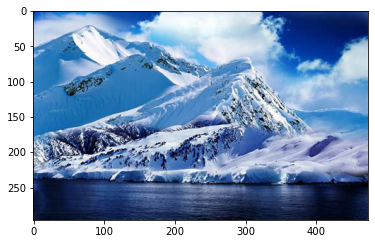

In [21]:
plt.imshow(pic)

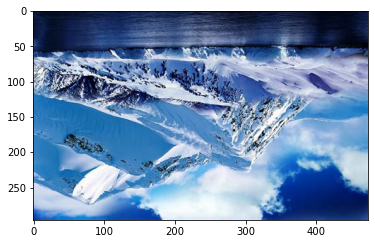

In [22]:
pic2 = pic[::-1,:] # flip vertical
plt.imshow(pic2)

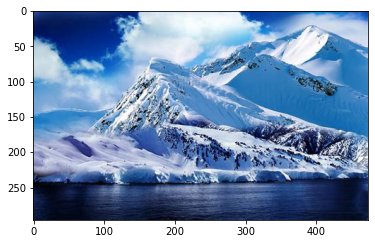

In [23]:
pic3 = pic[:,::-1] # flip horizontal
plt.imshow(pic3)

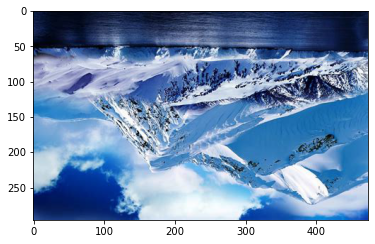

In [24]:
pic4 = pic[::-1,::-1] # flip vertical and horizontal
plt.imshow(pic4)

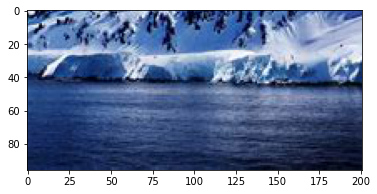

In [25]:
plt.imshow(pic[200:300,100:301])

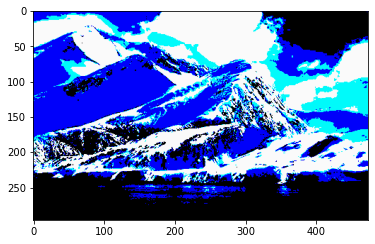

In [26]:
pic_masked = np.where(pic>150, 250, 0)
plt.imshow(pic_masked)

## 3. Exploring Basic Charting Functions with Matplotlib and Seaborn
### 3.1. Multiple Line Plots of different np arrays

In [27]:
x = np.linspace(0, 4*np.pi, 100)
y = np.zeros((100,3))
z = randn(100)
y[:,0] = np.sin(x)
y[:,1] = np.sin(2*x+np.pi)
y[:,2] = np.where( ((y[:,0]>0) & (y[:,1]>0)), y[:,0]+y[:,1], (10+z*(y[:,0]+y[:,1])))


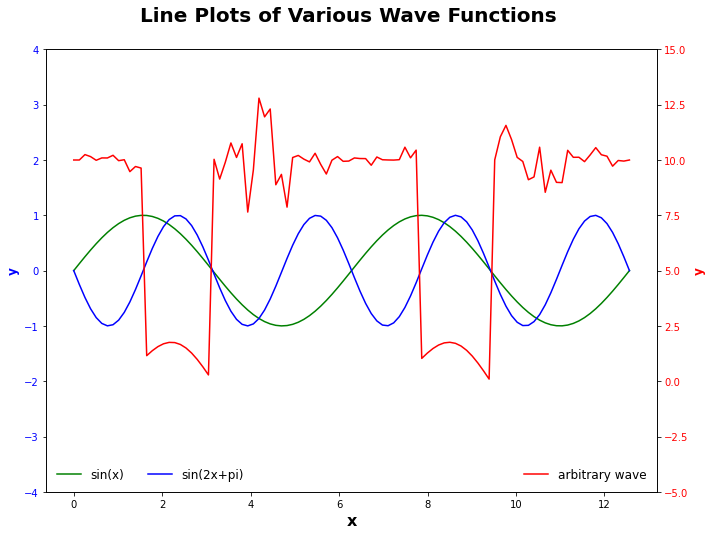

In [28]:
fig, ax1 = plt.subplots(figsize=[10,7])
col = ['green', 'blue', 'red']
ax1.plot(x,y[:,0], color=col[0], label='sin(x)')
ax1.plot(x,y[:,1], color=col[1], label='sin(2x+pi)')
ax1.set_xlabel('x', fontsize=16, fontweight='semibold')
ax1.set_ylim([-4,4])
ax1.set_ylabel('y', color='blue', fontsize=12, fontweight='semibold')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(x,y[:,2], color=col[2], label='arbitrary wave')
ax2.set_ylabel('y', color='red', fontsize=12, fontweight='semibold')
ax2.set_ylim([-5,15])
ax2.tick_params(axis='y', labelcolor='red')

ax1.legend(loc=3, ncol=2, fontsize=12, frameon=False)
ax2.legend(loc=4, ncol=2, fontsize=12, frameon=False)
fig.tight_layout()  
plt.title('Line Plots of Various Wave Functions \n', fontsize=20, fontweight="bold")
plt.show()

### 3.2. Organization of Subplots 

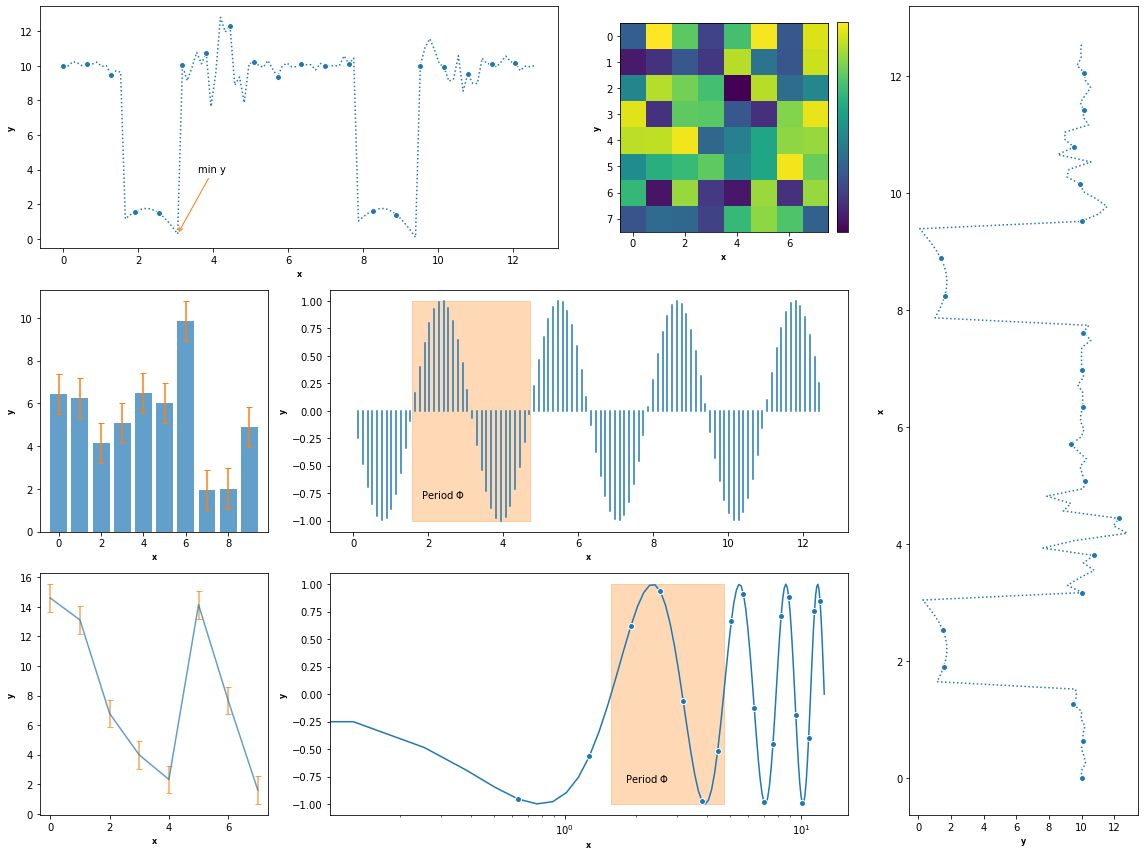

In [29]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=[16,12]) #, constrained_layout=True)

gs = GridSpec(3, 4, figure=fig)
ax1 = fig.add_subplot(gs[0, :-2])
ax1.plot(x,y[:,2], 'C0o:', markevery=5, mec='1.0', label='arbitrary wave')
ax1.set_xlabel('x', fontsize=8, fontweight='semibold')
ax1.set_ylabel('y', fontsize=8, fontweight='semibold')
ax1.annotate('min y ', (x[24],y[24,2]),(4,4),ha='center', va='center',arrowprops={'arrowstyle' : '->', 'color': 'C1'})

ax2 = fig.add_subplot(gs[1, 0])
b1 = np.arange(10)
b2 = np.random.uniform(1, 10, 10)
ax2.bar(b1, b2, yerr=np.std(randn(100)), alpha=0.7, ecolor='C1', capsize=3)
ax2.set_xlabel('x', fontsize=8, fontweight='semibold')
ax2.set_ylabel('y', fontsize=8, fontweight='semibold')

ax3 = fig.add_subplot(gs[2, 0])
c1 = np.arange(8)
c2 = np.random.uniform(0, 1, 8)*15
ax3.errorbar(c1, c2, np.std(randn(100)), alpha=0.7, ecolor='C1', capsize=3)
ax3.set_xlabel('x', fontsize=8, fontweight='semibold')
ax3.set_ylabel('y', fontsize=8, fontweight='semibold')

ax4 = fig.add_subplot(gs[0, 2])
Z = np.random.uniform(0, 1, (8,8))
im = ax4.imshow(Z, alpha=1)
cb = plt.colorbar(im, fraction=0.046, pad=0.04)
cb.set_ticks([])
ax4.set_xlabel('x', fontsize=8, fontweight='semibold')
ax4.set_ylabel('y', fontsize=8, fontweight='semibold')

ax5 = fig.add_subplot(gs[1, 1:3])
e1,e2 = [], []
for i in x:
    e1.extend([i, i, None]), e2.extend([0, np.sin(2*i+np.pi), None])
ax5.plot(e1, e2, 'C0')
ax5.fill_betweenx([-1,1],[np.pi/2],[np.pi*3/2],color='C1', alpha=0.3)
ax5.text(1.8, -0.8, r'Period $\Phi$')
ax5.set_xlabel('x', fontsize=8, fontweight='semibold')
ax5.set_ylabel('y', fontsize=8, fontweight='semibold')

ax6 = fig.add_subplot(gs[2, 1:3])
ax6.set_xscale('log')
ax6.plot(x,y[:,1], 'C0o-', markevery=5, mec='1.0')
ax6.fill_betweenx([-1,1],[np.pi/2],[np.pi*3/2],color='C1', alpha=0.3)
ax6.text(1.8, -0.8, r'Period $\Phi$')
ax6.set_xlabel('x', fontsize=8, fontweight='semibold')
ax6.set_ylabel('y', fontsize=8, fontweight='semibold')

ax7 = fig.add_subplot(gs[:, 3])
ax7.plot(y[:,2],x, 'C0o:', markevery=5, mec='1.0', label='arbitrary wave')
ax7.set_xlabel('y', fontsize=8, fontweight='semibold')
ax7.set_ylabel('x', fontsize=8, fontweight='semibold')

fig.tight_layout()

### 3.3. Organization of Subplots Made Using Different Charting Libraries

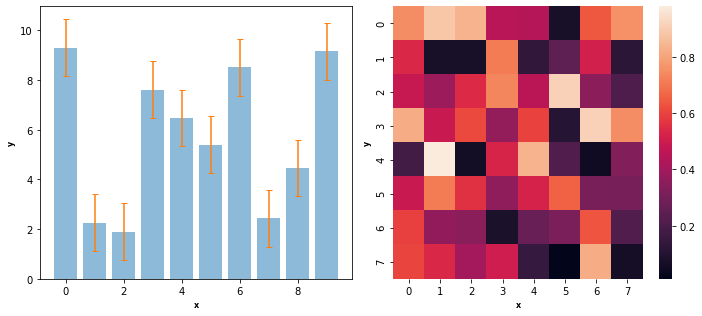

In [30]:
fig = plt.figure(figsize=[10,4.5]) #, constrained_layout=True)

gs = GridSpec(1, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
b1 = np.arange(10)
b2 = np.random.uniform(1, 10, 10)
ax1.bar(b1, b2, yerr=np.std(randn(100)), alpha=0.5, ecolor='C1', capsize=3)
ax1.set_xlabel('x', fontsize=8, fontweight='semibold')
ax1.set_ylabel('y', fontsize=8, fontweight='semibold')

ax2 = fig.add_subplot(gs[0, 1])
# sns.pairplot(a1,a2,b1,b2)
Z = np.random.uniform(0, 1, (8,8))
sns.heatmap(Z)  # not all type of sns plots can be placed on plt subplot axis. 
ax2.set_xlabel('x', fontsize=8, fontweight='semibold')
ax2.set_ylabel('y', fontsize=8, fontweight='semibold')

fig.tight_layout()

References:
1. https://numpy.org/devdocs/user/index.html
2. https://matplotlib.org/stable/plot_types/index.html
3. https://seaborn.pydata.org/examples/index.html
    

__Useful np routines:__
* __Array Creation:__ arange, array, copy, empty, empty_like, eye, fromfile, fromfunction, identity, linspace, logspace, mgrid, ogrid, ones, ones_like, r, zeros, zeros_like
* __Conversions:__ ndarray.astype, atleast_1d, atleast_2d, atleast_3d, mat
* __Manipulations:__ array_split, column_stack, concatenate, diagonal, dsplit, dstack, hsplit, hstack, ndarray.item, newaxis, ravel, repeat, reshape, resize, squeeze, swapaxes, take, transpose, vsplit, vstack
* __Questions/Logics:__ all, any, nonzero, where, isreal, isnan, nan_to_num, select
* __Ordering:__ argmax, argmin, argsort, max, min, ptp, searchsorted, sort
* __Operations:__ choose, compress, cumprod, cumsum, inner, ndarray.fill, imag, prod, put, putmask, real, sum
* __Basic Statistics:__ cov, mean, std, var
* __Basic Linear Algebra:__ cross, dot, outer, linalg.svd, vdot


In [31]:
#np.loadtxt('simple.csv', delimiter = ',', skiprows = 1)